In [213]:
import numpy as np 
import pandas as pd 


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE

import xgboost as xgb  # Load this xgboost

from sklearn.model_selection import train_test_split


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

Importing the datasets


In [216]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [217]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [218]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [221]:
data.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [223]:
data.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

## Removing columns with more than  50% missing data ##

In [227]:
missing_colums_50 = data.columns[(data.isnull().sum() / len(data.id)) > 0.5]

In [229]:
missing_colums_50

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [231]:
data = data.drop(missing_colums_50, axis=1)

In [233]:
data.shape

(69999, 142)

## Checking the percentage of remaining missing columns ##

In [236]:
missing_columns = data.isnull().sum() / len(data.id)

In [238]:
# All colummns with missing values
missing_columns = missing_columns[missing_columns > 0]
missing_columns.sort_values()

last_date_of_month_7    0.005700
loc_og_t2o_mou          0.010029
std_og_t2o_mou          0.010029
loc_ic_t2o_mou          0.010029
last_date_of_month_8    0.010472
                          ...   
std_ic_t2t_mou_8        0.052901
loc_og_mou_8            0.052901
onnet_mou_8             0.052901
loc_ic_t2f_mou_8        0.052901
std_ic_t2m_mou_8        0.052901
Length: 95, dtype: float64

### Checking rows with 5% missing values ###

In [241]:
missing_columns = missing_columns[missing_columns > 0.05]

In [243]:
missing_columns

onnet_mou_8         0.052901
offnet_mou_8        0.052901
roam_ic_mou_8       0.052901
roam_og_mou_8       0.052901
loc_og_t2t_mou_8    0.052901
loc_og_t2m_mou_8    0.052901
loc_og_t2f_mou_8    0.052901
loc_og_t2c_mou_8    0.052901
loc_og_mou_8        0.052901
std_og_t2t_mou_8    0.052901
std_og_t2m_mou_8    0.052901
std_og_t2f_mou_8    0.052901
std_og_t2c_mou_8    0.052901
std_og_mou_8        0.052901
isd_og_mou_8        0.052901
spl_og_mou_8        0.052901
og_others_8         0.052901
loc_ic_t2t_mou_8    0.052901
loc_ic_t2m_mou_8    0.052901
loc_ic_t2f_mou_8    0.052901
loc_ic_mou_8        0.052901
std_ic_t2t_mou_8    0.052901
std_ic_t2m_mou_8    0.052901
std_ic_t2f_mou_8    0.052901
std_ic_t2o_mou_8    0.052901
std_ic_mou_8        0.052901
spl_ic_mou_8        0.052901
isd_ic_mou_8        0.052901
ic_others_8         0.052901
dtype: float64

In [245]:
##All missing columns are numbers with maximum vaues as 0 and same rows are missing, so removing those rows
data = data[~data['onnet_mou_8'].isnull()]


In [247]:
missing_columns = data.isnull().sum() / len(data.id)
missing_columns = missing_columns[missing_columns > 0.05]
missing_columns.sort_values()

Series([], dtype: float64)

In [249]:
# All colummns with missing values
missing_columns = data.isnull().sum() / len(data.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns.sort_values()

last_date_of_month_7    0.000181
date_of_last_rech_7     0.009714
date_of_last_rech_6     0.013711
std_og_t2c_mou_7        0.016110
std_og_mou_7            0.016110
                          ...   
loc_og_t2f_mou_6        0.028282
loc_ic_t2t_mou_6        0.028282
spl_og_mou_6            0.028282
std_og_mou_6            0.028282
loc_ic_mou_6            0.028282
Length: 62, dtype: float64

In [251]:
##All missing columns are numbers with maximum vaues as 0 and same rows are missing, so removing those rows
data = data[~data['spl_og_mou_6'].isnull()]

In [253]:
missing_columns = data.isnull().sum() / len(data.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns.sort_values()

date_of_last_rech_7    0.007591
date_of_last_rech_6    0.008258
onnet_mou_7            0.008988
ic_others_7            0.008988
isd_ic_mou_7           0.008988
spl_ic_mou_7           0.008988
std_ic_mou_7           0.008988
std_ic_t2o_mou_7       0.008988
std_ic_t2f_mou_7       0.008988
std_ic_t2m_mou_7       0.008988
std_ic_t2t_mou_7       0.008988
loc_ic_mou_7           0.008988
loc_ic_t2f_mou_7       0.008988
loc_ic_t2m_mou_7       0.008988
loc_ic_t2t_mou_7       0.008988
og_others_7            0.008988
spl_og_mou_7           0.008988
std_og_mou_7           0.008988
std_og_t2c_mou_7       0.008988
std_og_t2f_mou_7       0.008988
std_og_t2m_mou_7       0.008988
std_og_t2t_mou_7       0.008988
loc_og_mou_7           0.008988
loc_og_t2c_mou_7       0.008988
loc_og_t2f_mou_7       0.008988
loc_og_t2m_mou_7       0.008988
loc_og_t2t_mou_7       0.008988
roam_og_mou_7          0.008988
roam_ic_mou_7          0.008988
offnet_mou_7           0.008988
isd_og_mou_7           0.008988
date_of_

In [255]:
##All missing columns are numbers with maximum vaues as 0 and same rows are missing, so removing those rows
data = data[~data['roam_og_mou_7'].isnull()]

In [257]:
missing_columns = data.isnull().sum() / len(data.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns.sort_values()

date_of_last_rech_7    0.007190
date_of_last_rech_6    0.008035
date_of_last_rech_8    0.016807
dtype: float64

### Only have 3 date fields with missing values now as date fields wont be required in classification ###

In [260]:
data = data.drop('date_of_last_rech_7',axis=1)

In [262]:
data = data.drop('date_of_last_rech_6',axis=1)

In [264]:
data = data.drop('date_of_last_rech_8',axis=1)

In [266]:
missing_columns = data.isnull().sum() / len(data.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns.sort_values()

Series([], dtype: float64)

In [268]:
data.shape

(63842, 139)

### Removing unwanted features ###

In [271]:
#Removing all date fields as it won't be used in classification
data = data.loc[:,~data.columns.str.contains('date', case=False)] 

In [273]:
data.shape

(63842, 136)

In [275]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 63842 entries, 0 to 69998
Data columns (total 136 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    circle_id           int64  
 2    loc_og_t2o_mou      float64
 3    std_og_t2o_mou      float64
 4    loc_ic_t2o_mou      float64
 5    arpu_6              float64
 6    arpu_7              float64
 7    arpu_8              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   offnet_mou_6        float64
 12   offnet_mou_7        float64
 13   offnet_mou_8        float64
 14   roam_ic_mou_6       float64
 15   roam_ic_mou_7       float64
 16   roam_ic_mou_8       float64
 17   roam_og_mou_6       float64
 18   roam_og_mou_7       float64
 19   roam_og_mou_8       float64
 20   loc_og_t2t_mou_6    float64
 21   loc_og_t2t_mou_7    float64
 22   loc_og_t2t_mou_8    float64
 23   loc_og_t2m_mou_6    float64
 24   loc_o

In [277]:
data['circle_id'].value_counts()

circle_id
109    63842
Name: count, dtype: int64

In [279]:
## Dropping Circle id as it has only 1 unique value
data = data.drop('circle_id',axis=1)

In [281]:
data.shape

(63842, 135)

### Train test split ###

In [284]:
X = data.drop('churn_probability',axis=1)

In [286]:
y = data['churn_probability']

In [288]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [290]:
X_train.shape

(44689, 134)

In [292]:
y_train.shape

(44689,)

In [294]:
## Checking the correlation among variables in x_train ##

<Axes: >

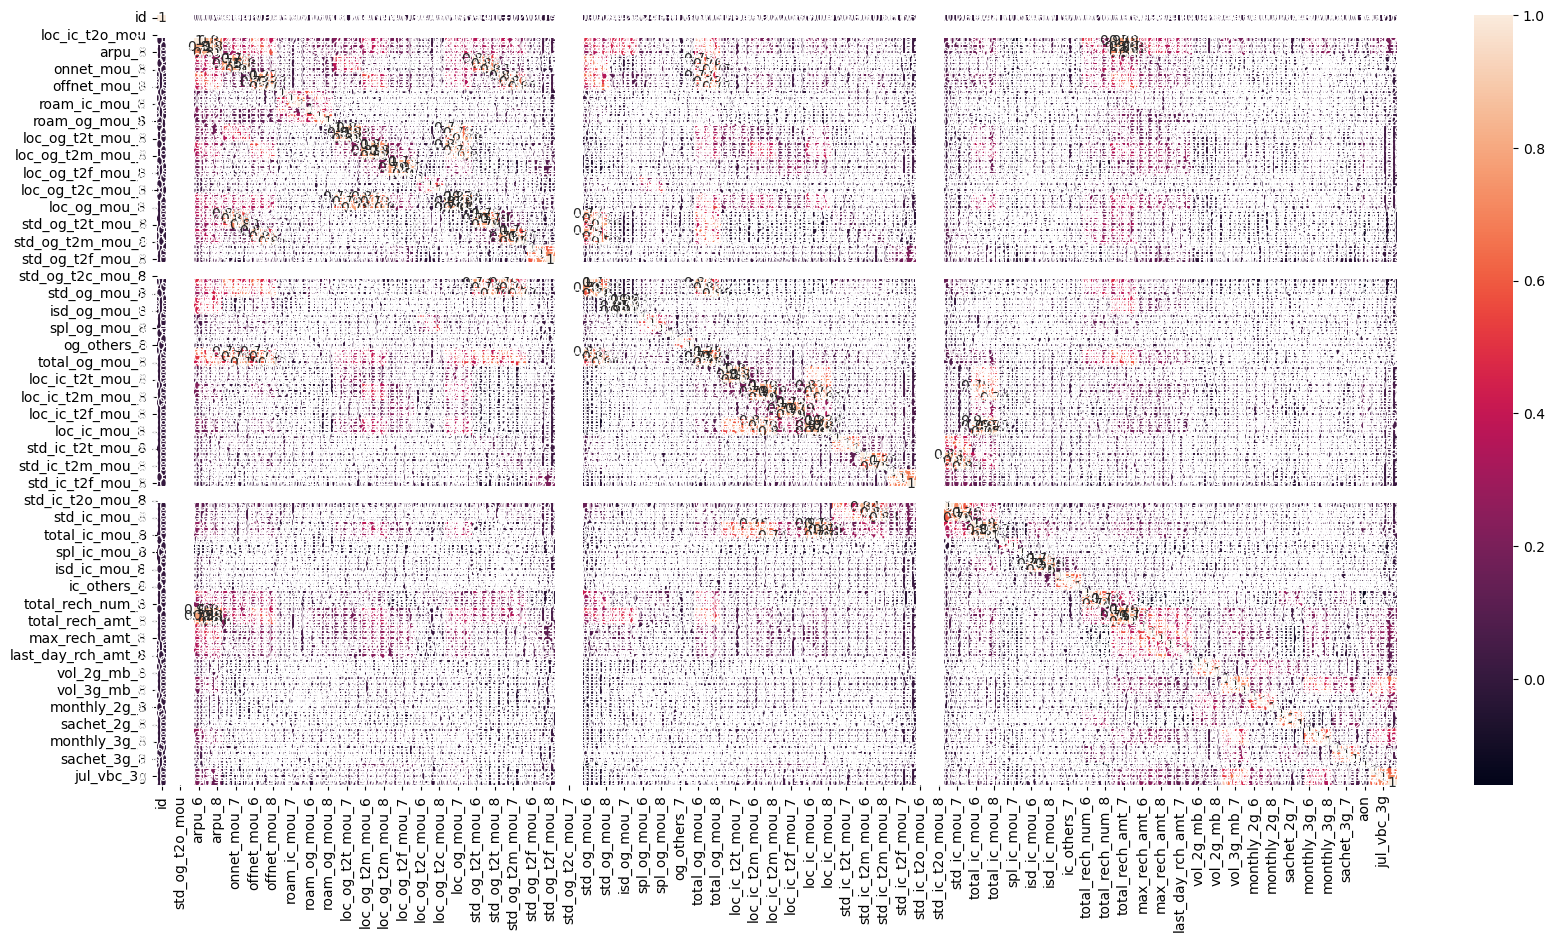

In [296]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [298]:
##Few independent variables like total_rech and arpu are highly correlated.Lets use PCA to find the non correlated features

In [300]:
##Scaling the values of X_train
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = pd.DataFrame(scale.fit_transform(X_train))
X_test_sc = pd.DataFrame(scale.transform(X_test))

In [302]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train_sc)

PCA(random_state=42)

In [303]:
pca.components_

array([[ 1.37720589e-03,  5.55111512e-17, -0.00000000e+00, ...,
         4.49866939e-02,  4.66972308e-02,  4.36311292e-02],
       [ 1.34147962e-03, -1.94289029e-16, -1.66533454e-16, ...,
         5.30966817e-02,  5.54696901e-02,  5.34425025e-02],
       [-3.35548211e-04,  2.42861287e-16, -1.00613962e-16, ...,
         2.24319740e-01,  2.32820566e-01,  2.21692473e-01],
       ...,
       [ 0.00000000e+00, -3.02971320e-01,  6.92758782e-02, ...,
        -3.46944695e-17,  6.93889390e-17, -4.16333634e-17],
       [-0.00000000e+00,  1.84141364e-01,  2.24283500e-04, ...,
        -0.00000000e+00, -0.00000000e+00, -6.24500451e-17],
       [-0.00000000e+00,  8.18352498e-01, -3.90264832e-01, ...,
         1.66533454e-16,  1.38777878e-17, -8.32667268e-17]])

In [304]:
pca.explained_variance_ratio_

array([1.31429862e-01, 7.76682615e-02, 5.31566299e-02, 4.54990805e-02,
       3.72570874e-02, 3.30299695e-02, 2.99077399e-02, 2.77860198e-02,
       2.45124818e-02, 2.38197512e-02, 2.25706528e-02, 2.15545893e-02,
       2.13691397e-02, 2.04934838e-02, 2.01873750e-02, 1.77401263e-02,
       1.66135113e-02, 1.56738030e-02, 1.45750926e-02, 1.41732657e-02,
       1.35437791e-02, 1.29540584e-02, 1.25348347e-02, 1.19421932e-02,
       1.02527795e-02, 9.84859876e-03, 9.59555361e-03, 9.28005096e-03,
       9.11906084e-03, 8.44219662e-03, 7.99650791e-03, 7.84382067e-03,
       7.56988627e-03, 7.49396835e-03, 7.20427812e-03, 6.93903659e-03,
       6.76108595e-03, 6.60782960e-03, 6.39074814e-03, 6.12484372e-03,
       6.01410347e-03, 5.66792854e-03, 5.34702965e-03, 5.12555015e-03,
       4.80615091e-03, 4.57919185e-03, 4.38268381e-03, 4.24526860e-03,
       4.22013856e-03, 4.00532803e-03, 3.93904645e-03, 3.79397566e-03,
       3.71847124e-03, 3.50126354e-03, 3.49104286e-03, 3.40857572e-03,
      

In [308]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

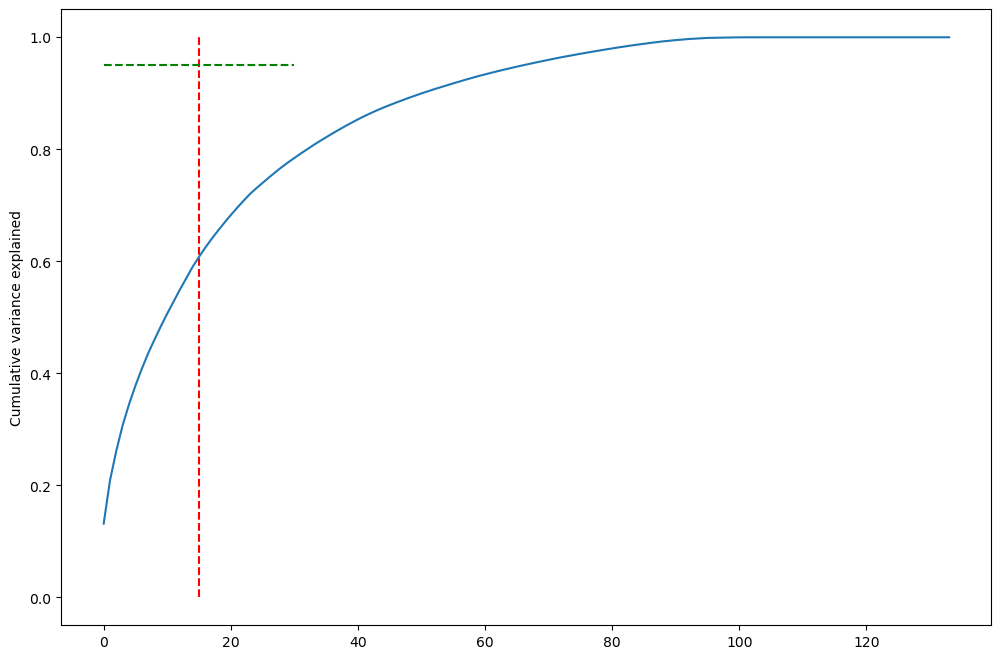

In [310]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### More than 80% of the variance can be explained by around 40 variables, more than 90% can be explained by 60 variables.

In [313]:
##Doing PCA with top 50 variables
from sklearn.decomposition import IncrementalPCA

In [315]:
pca_final = IncrementalPCA(n_components=40)

In [317]:
X_train_pca = pca_final.fit_transform(X_train_sc)

In [318]:
X_train_pca.shape

(44689, 40)

In [319]:
corrmat = np.corrcoef(X_train_pca.transpose())

<Axes: >

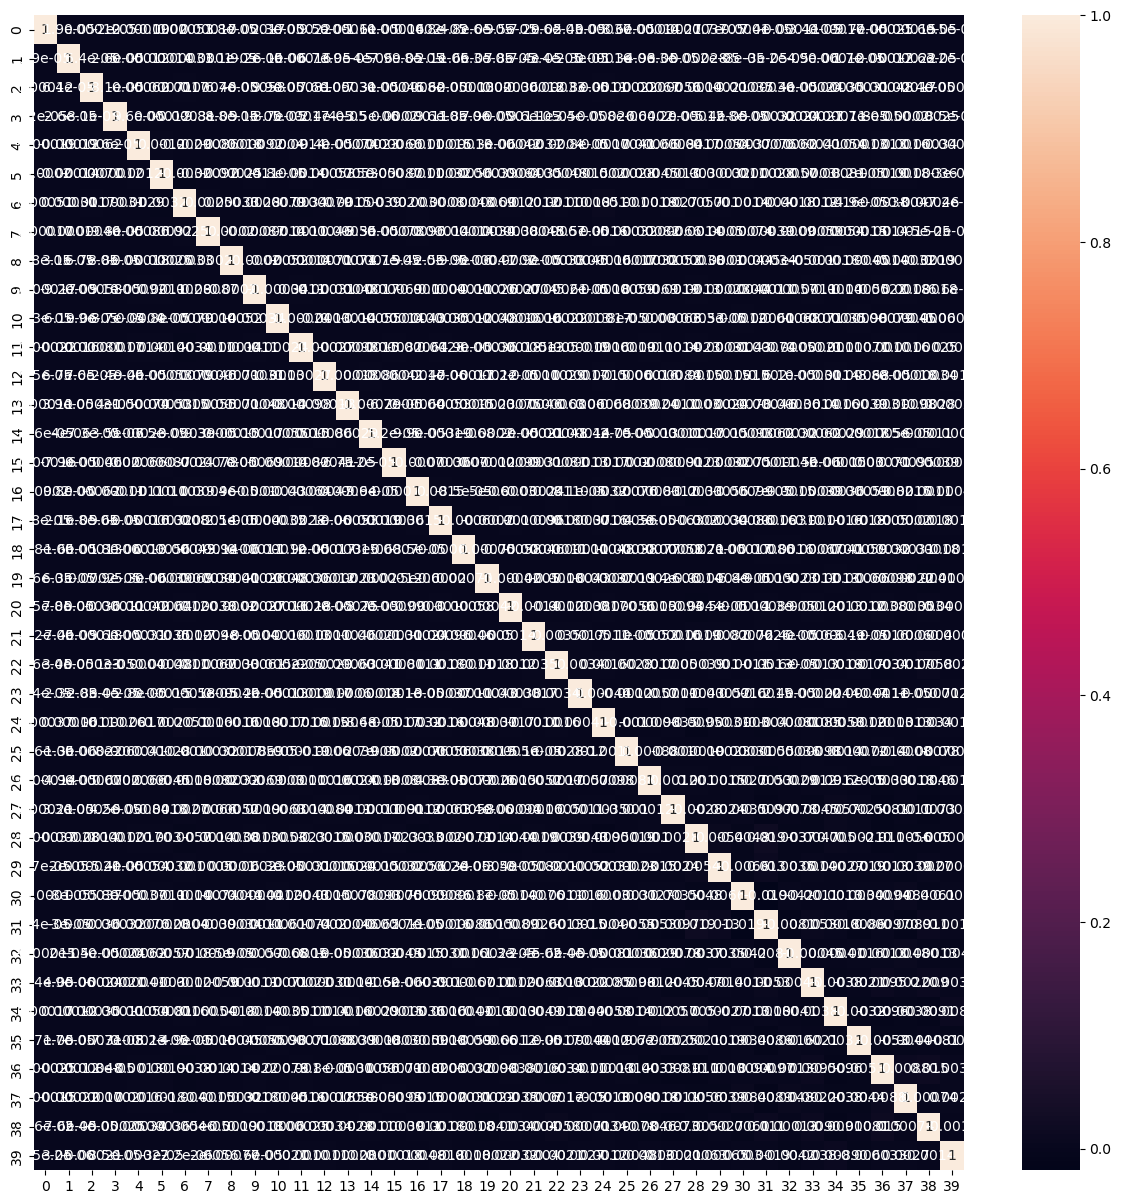

In [323]:
##Plotting the correlation among variables now
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### Figure shows no correlation among independent variables ###

In [325]:
X_test_pca = pca_final.transform(X_test_sc)
X_test_pca.shape

(19153, 40)

### Logistic regression ###

In [327]:
from sklearn.linear_model import LogisticRegression

In [328]:
logistic_pca = LogisticRegression()

In [329]:
model_pca = logistic_pca.fit(X_train_pca, y_train)

In [330]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [331]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

#### Logistic regression with feature selection using PCA is giving 83% accuracy ####

### Using XGBoost classifier ###

In [341]:
import xgboost as xgb

In [343]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic', gamma=0.5, learning_rate=0.02, max_depth=5, min_child_weight=7, n_estimators=750)
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.5,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 7,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [345]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_pca)

In [346]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_pca)
xgb_predictions_prob

array([[0.9927269 , 0.00727309],
       [0.96929765, 0.03070232],
       [0.9954581 , 0.00454186],
       ...,
       [0.7260004 , 0.2739996 ],
       [0.969454  , 0.03054603],
       [0.9925156 , 0.00748439]], dtype=float32)

In [347]:
xgb_predictions.shape

(19153,)

In [348]:
accuracy_score(y_test, xgb_predictions)

0.942619955098418

### Getting 94% accuracy with XGBoost without aany parameter selection ###

In [350]:
##Trying the model with the sample data
unseen.head

<bound method NDFrame.head of           id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      69999        109             0.0             0.0             0.0   
1      70000        109             0.0             0.0             0.0   
2      70001        109             0.0             0.0             0.0   
3      70002        109             0.0             0.0             0.0   
4      70003        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
29995  99994        109             0.0             0.0             0.0   
29996  99995        109             0.0             0.0             0.0   
29997  99996        109             0.0             0.0             0.0   
29998  99997        109             0.0             0.0             0.0   
29999  99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 

In [356]:
X_unseen = unseen[X_train.columns]

In [358]:
missing_data_percent = X_unseen.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [360]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='constant', fill_value=0)
X_unseen[impute_cols] = imp.fit_transform(X_unseen[impute_cols])

In [362]:
X_unseen_sc = pd.DataFrame(scale.transform(X_unseen))

In [364]:
X_unseen_pca = pca_final.transform(X_unseen_sc)

In [366]:
X_unseen_pca.shape

(30000, 40)

In [390]:
xgb_predictions_unseen = xgb_cfl.predict(X_unseen_pca)

In [392]:
unseen['churn_probability'] = xgb_predictions_unseen

In [394]:
unseen.head

<bound method NDFrame.head of           id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      69999        109             0.0             0.0             0.0   
1      70000        109             0.0             0.0             0.0   
2      70001        109             0.0             0.0             0.0   
3      70002        109             0.0             0.0             0.0   
4      70003        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
29995  99994        109             0.0             0.0             0.0   
29996  99995        109             0.0             0.0             0.0   
29997  99996        109             0.0             0.0             0.0   
29998  99997        109             0.0             0.0             0.0   
29999  99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 

In [396]:
unseen.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probablity',
       'churn_probability'],
      dtype='object', length=173)

In [398]:
output = unseen[['id','churn_probability']]

In [400]:
output.head

<bound method NDFrame.head of           id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]>

In [408]:
output.to_csv('submission_8_Sep.csv',index=False)

In [404]:
output['id']

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [406]:
unseen['id']

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64